EXP3
# Stationary of a time series data

In [ ]:
 pip install yfinance statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
stock=yf.download("GOOGL", start="2010-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


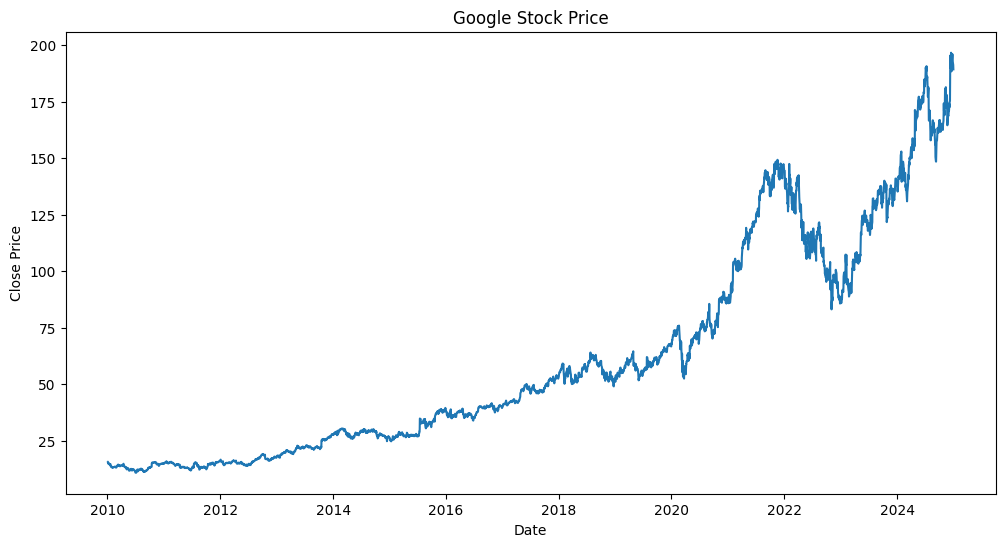

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'])
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

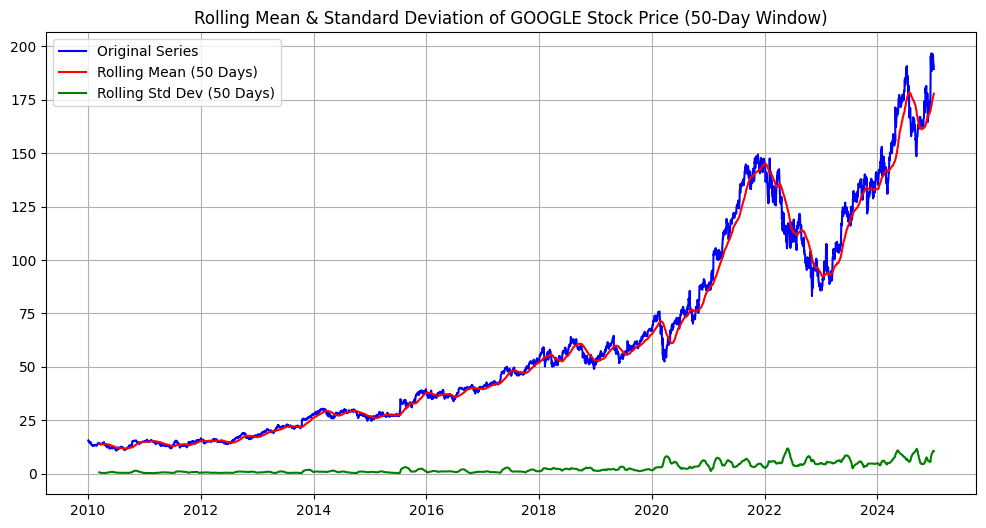

In [ ]:
#Calculate and Plot Rolling Mean and Rolling Standard Deviation (50-day Window)
rolling_mean=stock['Close'].rolling(window=50).mean()
rolling_std=stock['Close'].rolling(window=50).std()
plt.figure(figsize=(12,6))
plt.plot(stock['Close'],color='blue',label='Original Series')
plt.plot(rolling_mean, color='red', label='Rolling Mean (50 Days)')
plt.plot(rolling_std, color='green', label='Rolling Std Dev (50 Days)')
plt.legend()
plt.title('Rolling Mean & Standard Deviation of GOOGLE Stock Price (50-Day Window)')
plt.grid(True)
plt.show()

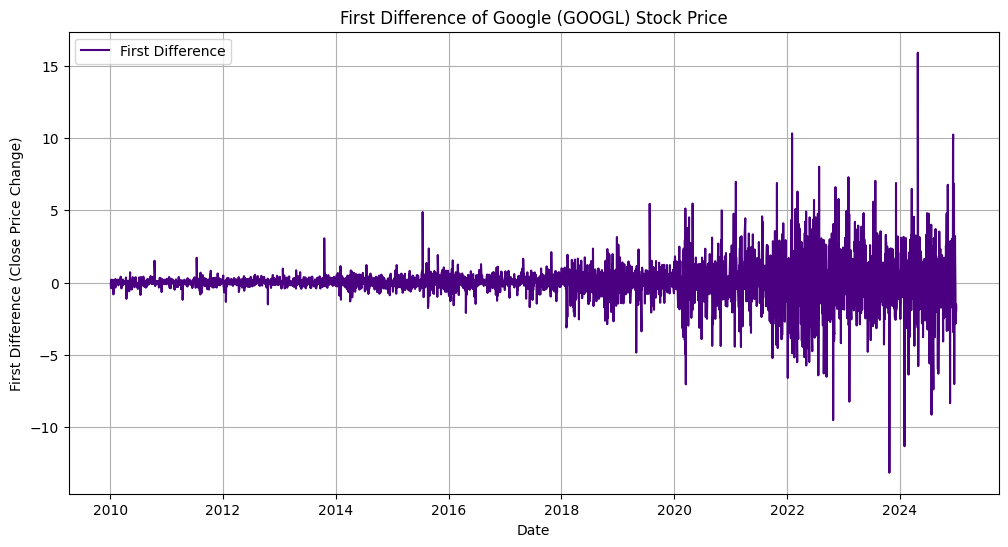

In [ ]:
#Examine Constant Mean & Variance and calculating first order difference
stock_diff=stock['Close'].diff().dropna()
plt.figure(figsize=(12,6))
plt.plot(stock_diff, color='indigo', label='First Difference')
plt.title('First Difference of Google (GOOGL) Stock Price')
plt.xlabel('Date')
plt.ylabel('First Difference (Close Price Change)')
plt.legend()
plt.grid(True)
plt.show()

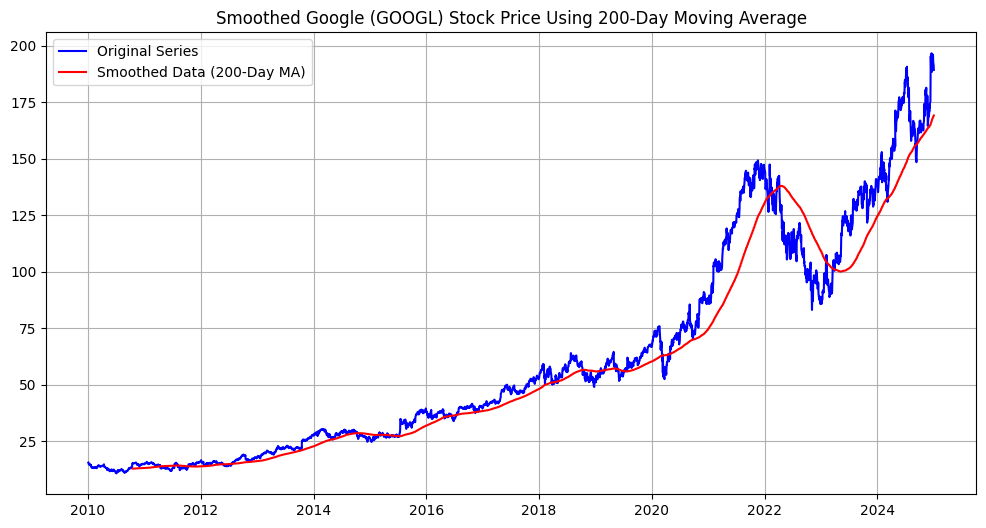

In [ ]:
#Use Moving Average (Smoothing) and Check for Stationarity
smoothed_data=stock['Close'].rolling(window=200).mean()
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], color='blue', label='Original Series')
plt.plot(smoothed_data, color='red', label='Smoothed Data (200-Day MA)')
plt.legend()
plt.title('Smoothed Google (GOOGL) Stock Price Using 200-Day Moving Average')
plt.grid(True)
plt.show()

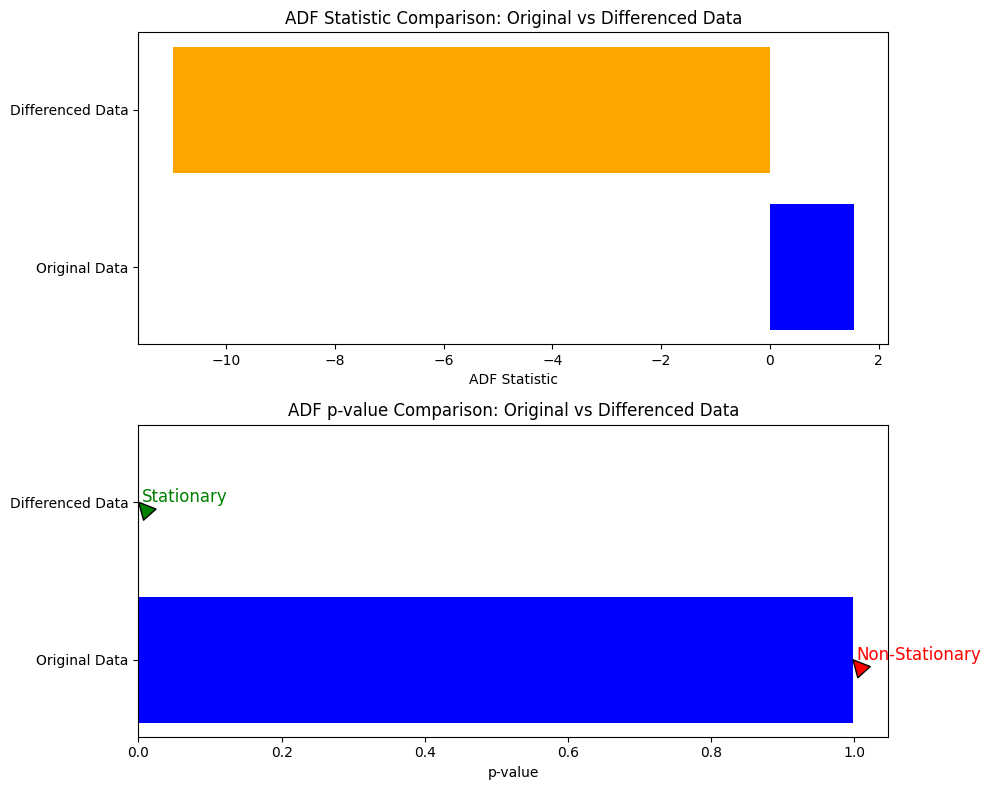


ADF Test Result for Original Data:
ADF Statistic: 1.5547876837183734
p-value: 0.9977153918105791


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# ADF Test on the original data (Before Smoothing)
adf_before_smoothing = adfuller(stock['Close'].dropna())
adf_stat_before = adf_before_smoothing[0]
p_value_before = adf_before_smoothing[1]

# ADF Test on the differenced data (After differencing)
adf_after_smoothing = adfuller(stock_diff.dropna())
adf_stat_after = adf_after_smoothing[0]
p_value_after = adf_after_smoothing[1]

# Plot ADF Statistic and p-value for Original and Differenced Data
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ADF Statistic Plot
ax[0].barh(['Original Data', 'Differenced Data'], [adf_stat_before, adf_stat_after], color=['blue', 'orange'])
ax[0].set_title('ADF Statistic Comparison: Original vs Differenced Data')
ax[0].set_xlabel('ADF Statistic')

# p-value Plot
ax[1].barh(['Original Data', 'Differenced Data'], [p_value_before, p_value_after], color=['blue', 'orange'])
ax[1].set_title('ADF p-value Comparison: Original vs Differenced Data')
ax[1].set_xlabel('p-value')

# Add annotations based on the ADF Test Results
for i, p_value in enumerate([p_value_before, p_value_after]):
    if p_value < 0.05:
        ax[1].annotate('Stationary', xy=(p_value, i), xytext=(p_value + 0.005, i),
                       arrowprops=dict(facecolor='green', shrink=0.05), color='green', fontsize=12)
    else:
        ax[1].annotate('Non-Stationary', xy=(p_value, i), xytext=(p_value + 0.005, i),
                       arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

# Output the ADF Test Results for understanding
print(f"\nADF Test Result for Original Data:")
print(f"ADF Statistic: {adf_stat_before}")
print(f"p-value: {p_value_before}")
